# <i class="fa-solid fa-magnifying-glass-chart"></i> Principal Component Analysis

Principal Component Analysis (PCA) is a *dimensionality reduction* technique. It is considered an *unsupervised* machine learning method, since we do not model any relationship with a target/response variable. Instead, PCA finds a lower-dimensional representation of our data.

Simply put, PCA finds the principal components (the *eigenvectors*) of the centered data matrix $X$. Each eigenvector points in a direction of maximal variance, ordered by how much variance it explains.

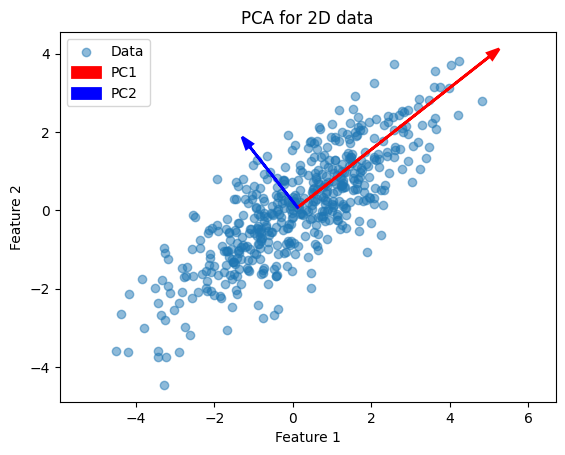

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Simulate & center 2D data
np.random.seed(0)
X = np.random.multivariate_normal([0, 0], [[3, 2], [2, 2]], size=500)
Xc = X - X.mean(axis=0)

# Run PCA: extract eigenvectors and eigenvalues
pca2d = PCA().fit(Xc)
pcs, scales = pca2d.components_, np.sqrt(pca2d.explained_variance_)

# Plot original data and principal components
fig, ax = plt.subplots()
ax.scatter(X[:, 0], X[:, 1], alpha=0.5, label='Data')
mean = X.mean(axis=0)
# Draw PC1 (red) and PC2 (blue)
ax.arrow(*mean, *(pcs[0] * scales[0] * 3), head_width=0.2, head_length=0.3, color='r', linewidth=2, label='PC1')
ax.arrow(*mean, *(pcs[1] * scales[1] * 3), head_width=0.2, head_length=0.3, color='b', linewidth=2, label='PC2')
ax.set(xlabel="Feature 1", ylabel="Feature 2", title="PCA for 2D data")
ax.axis('equal')
ax.legend()
plt.show()

This example illustrates how PCA finds the two orthogonal directions (eigenvectors) along which the data vary most.

Next, we apply PCA to the Iris dataset (4 features). First, we can inspect which features are most discriminative with a pairplot:

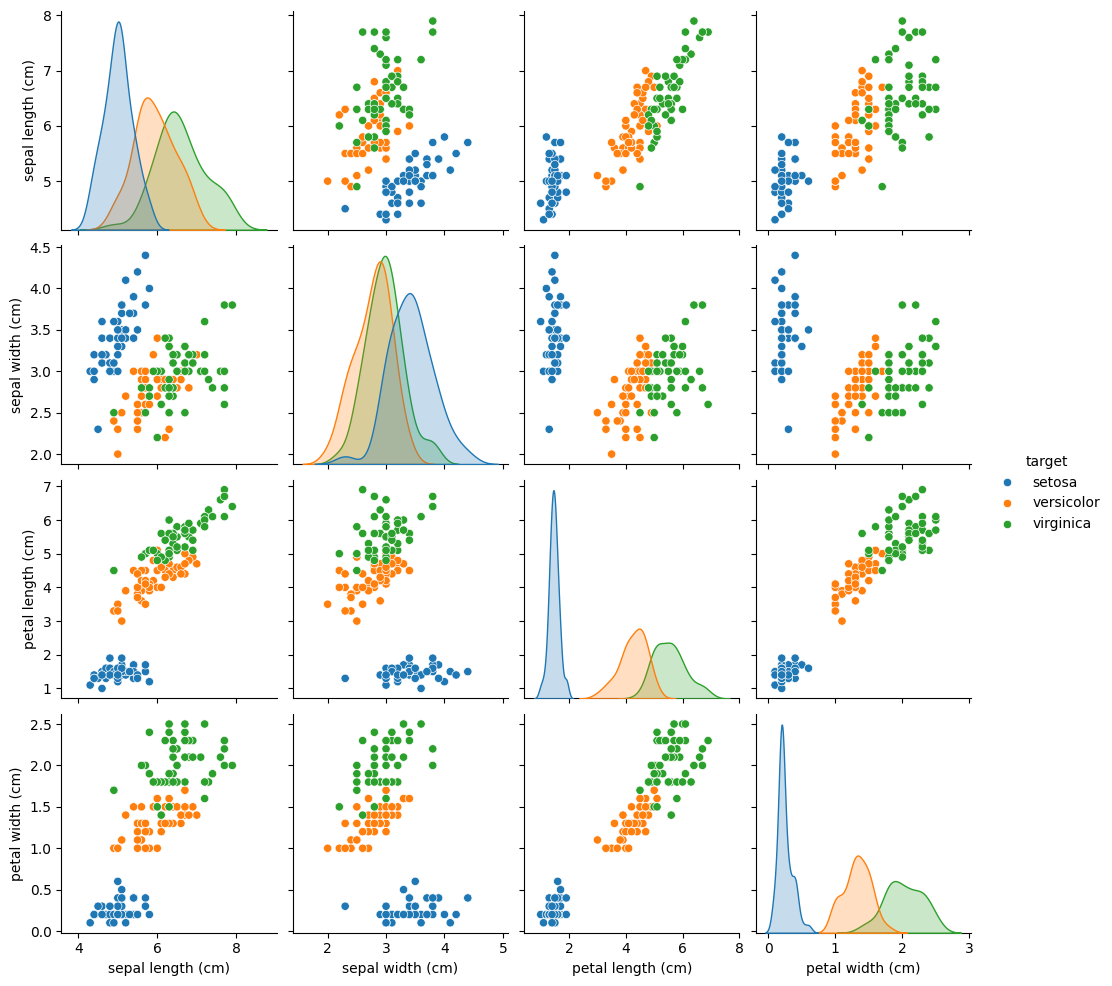

In [2]:
import seaborn as sns
from sklearn.datasets import load_iris

# Load Iris as a DataFrame for easy plotting
iris = load_iris(as_frame=True)
iris.frame["target"] = iris.target_names[iris.target]
_ = sns.pairplot(iris.frame, hue="target")


The pairplot shows **petal length** and **petal width** separate the three species most clearly.

In [3]:
from sklearn.decomposition import PCA

# Prepare data arrays
X, y = iris.data, iris.target
feature_names = iris.feature_names

# Fit PCA to retain first 3 principal components
pca = PCA(n_components=3).fit(X)

# Display feature-loadings and explained variance
print("Feature names:\n", feature_names)
print("\nPrincipal components (loadings):\n", pca.components_)
print("\nExplained variance ratio:\n", pca.explained_variance_ratio_)

Feature names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Principal components (loadings):
 [[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]
 [-0.58202985  0.59791083  0.07623608  0.54583143]]

Explained variance ratio:
 [0.92461872 0.05306648 0.01710261]


* **`pca.components_`**: each row is an eigenvector (unit length) showing how the four original features load onto each principal component.
* **`pca.explained_variance_ratio_`**: the fraction of total variance each component explains (e.g. PC1 ≈ 0.92, PC2 ≈ 0.05, PC3 ≈ 0.02).

Since PC1 explains over 92% of the variance, projecting onto it alone already captures most of the dataset’s structure.

Finally, we can project the data wit the `.transform(X)` method. This does the following:

1. Centers `X` by subtracting each feature’s mean.
2. Computes dot-products with the selected eigenvectors.

The resulting `X_pca` matrix has shape `(n_samples, 3)`, giving the coordinates of each sample in the PCA subspace.

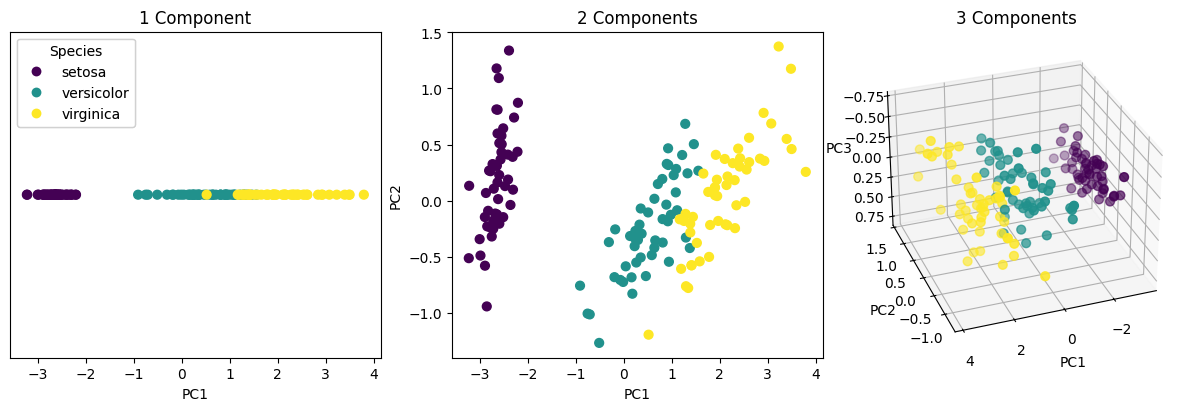

In [4]:
# Project (transform) the data into the first 3 PCs
X_pca = pca.transform(X)

# Plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12, 4), constrained_layout=True)

ax1 = fig.add_subplot(1, 3, 1)
scatter1 = ax1.scatter(X_pca[:, 0], np.zeros_like(X_pca[:, 0]), c=y, cmap='viridis', s=40)
ax1.set(title='1 Component', xlabel='PC1')
ax1.get_yaxis().set_visible(False)

ax2 = fig.add_subplot(1, 3, 2)
ax2.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=40)
ax2.set(title='2 Components', xlabel='PC1', ylabel='PC2')

ax3 = fig.add_subplot(1, 3, 3, projection='3d', elev=-150, azim=110)
ax3.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='viridis', s=40)
ax3.set(title='3 Components', xlabel='PC1', ylabel='PC2', zlabel='PC3')

handles, labels = scatter1.legend_elements()
legend = ax1.legend(handles, iris.target_names, loc='upper left', title='Species')
ax1.add_artist(legend);